In [10]:
import json
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import matplotlib.cm as cm
import numpy as np
import pandas as pd

In [17]:
# Obtain Dice results
with open('/home/t722s/Desktop/Sam-Med3DTest/BratsMiniOld/multi_run_results_original.json', 'r') as f:
    original = json.load(f)

with open('/home/t722s/Desktop/Sam-Med3DTest/evalBrats/gt_crop_interactive.json', 'r') as f:
    gt_i = json.load(f)

with open('/home/t722s/Desktop/Sam-Med3DTest/evalBrats/gt_crop_not_interactive.json', 'r') as f:
    gt_not_i = json.load(f)

with open('/home/t722s/Desktop/Sam-Med3DTest/evalBrats/point_crop_interactive.json', 'r') as f:
    pt_i = json.load(f)

with open('/home/t722s/Desktop/Sam-Med3DTest/evalBrats/point_crop_not_interactive.json', 'r') as f:
    pt_not_i = json.load(f)

dice_arrays = {
    'original': np.array([v['dice'] for v in original.values()]).T,
    'gt_i':     np.array([v['dice'] for v in gt_i.values()]).T,
    'pt_i':     np.array([v['dice'] for v in pt_i.values()]).T,
    'gt_not_i': np.array([v['dice'] for v in gt_not_i.values()]).T,
    'pt_not_i': np.array([v['dice'] for v in pt_not_i.values()]).T,
}


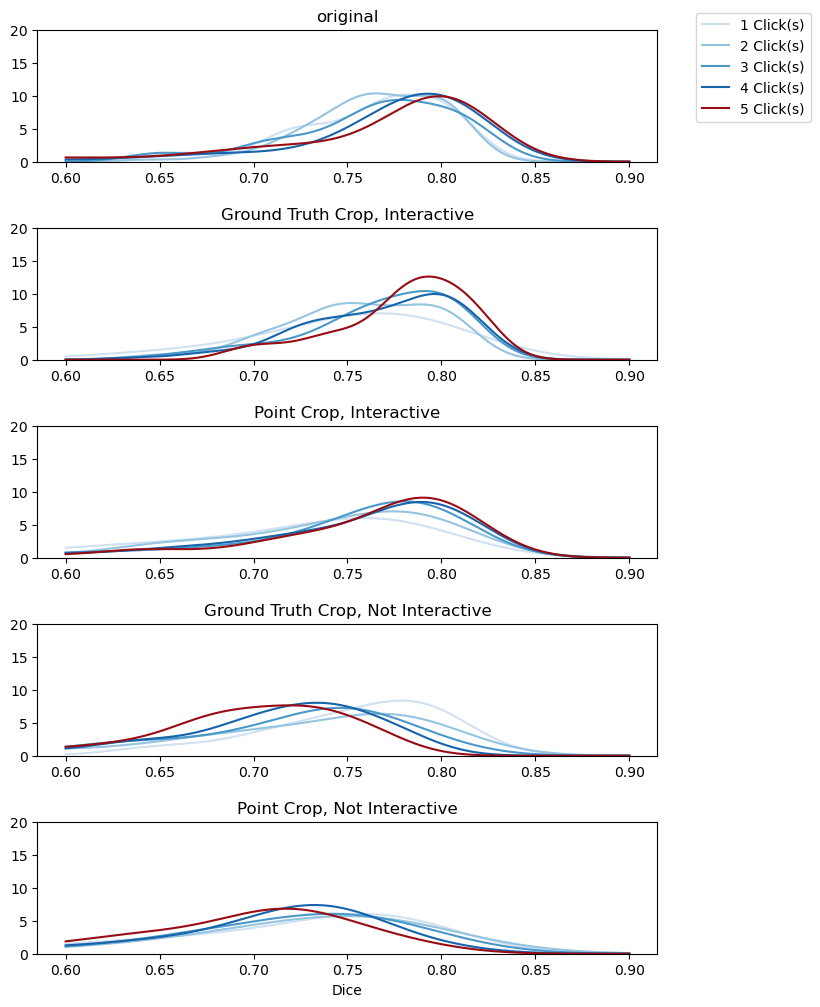

In [12]:
# Common plotting elements
num_rows = 5
x_range = np.linspace(0.6, 0.9, 500)
color_start = 0.2  # Start from a darker shade
color_end = 1  # End before the darkest shade to keep a uniform intensity
colors = [cm.Blues(i / (num_rows-1) * (color_end - color_start) + color_start) for i in range(num_rows-1)]
colors.append(cm.Reds(0.9))
protocol_names = {
    'original': 'original',
    'gt_i':     'Ground Truth Crop, Interactive',
    'gt_not_i': 'Ground Truth Crop, Not Interactive',
    'pt_i':     'Point Crop, Interactive',
    'pt_not_i': 'Point Crop, Not Interactive',
}

fig, ax = plt.subplots(5,1, figsize = (8,12))
plt.subplots_adjust(hspace=0.5, right=0.9)


for i, (protocol, ar) in enumerate(dice_arrays.items()):
    for j, row in enumerate(ar):
        kde = gaussian_kde(row)
        kde_values = kde(x_range)
        
        # Plot each row's KDE with a different color
        ax[i].plot(x_range, kde_values, color=colors[j], label=f'{j+1} Click(s)')

    ax[i].set_title(protocol_names[protocol])
    ax[i].set_xlabel(None)
    ax[i].set_ylabel(None)
    ax[i].set_ylim([0,20])

    if i == 0: 
        fig.legend(loc = 'upper right', bbox_to_anchor=(1.1, 0.9))

ax[4].set_xlabel('Dice')
plt.show()


In [13]:

summary = dict()
df = pd.DataFrame(columns = ['protocol', 'n clicks', 'min', '1st', 'med', 'mean', '3rd', 'std'])
for protocol, ar in dice_arrays.items():
    summary[protocol] = dict()
    for i, row in enumerate(ar):
        d = dict()
        d = {
            'protocol': protocol_names[protocol],
            'n clicks': i+1,
            'min': np.min(row),
            '1st': np.quantile(row, 0.25),
            'med': np.median(row),
            'mean': np.mean(row),
            '3rd': np.quantile(row, 0.75),
            'std': np.std(row)
        }
        df.loc[len(df)] = d
        summary[protocol][f'click{i+1}']=d

df = df.round(decimals=4)
#display(df)
display(df[df['n clicks']==5])

,protocol,n clicks,min,1st,med,mean,3rd,std
4,original,5,0.5652,0.7477,0.7894,0.7665,0.8061,0.0591
9,"Ground Truth Crop, Interactive",5,0.6900,0.7638,0.7876,0.7793,0.8054,0.0345
14,"Point Crop, Interactive",5,0.5439,0.7294,0.7782,0.7573,0.7988,0.0593
19,"Ground Truth Crop, Not Interactive",5,0.5353,0.6696,0.7049,0.6982,0.7379,0.0509
24,"Point Crop, Not Interactive",5,0.3952,0.6528,0.7038,0.6885,0.7327,0.0693


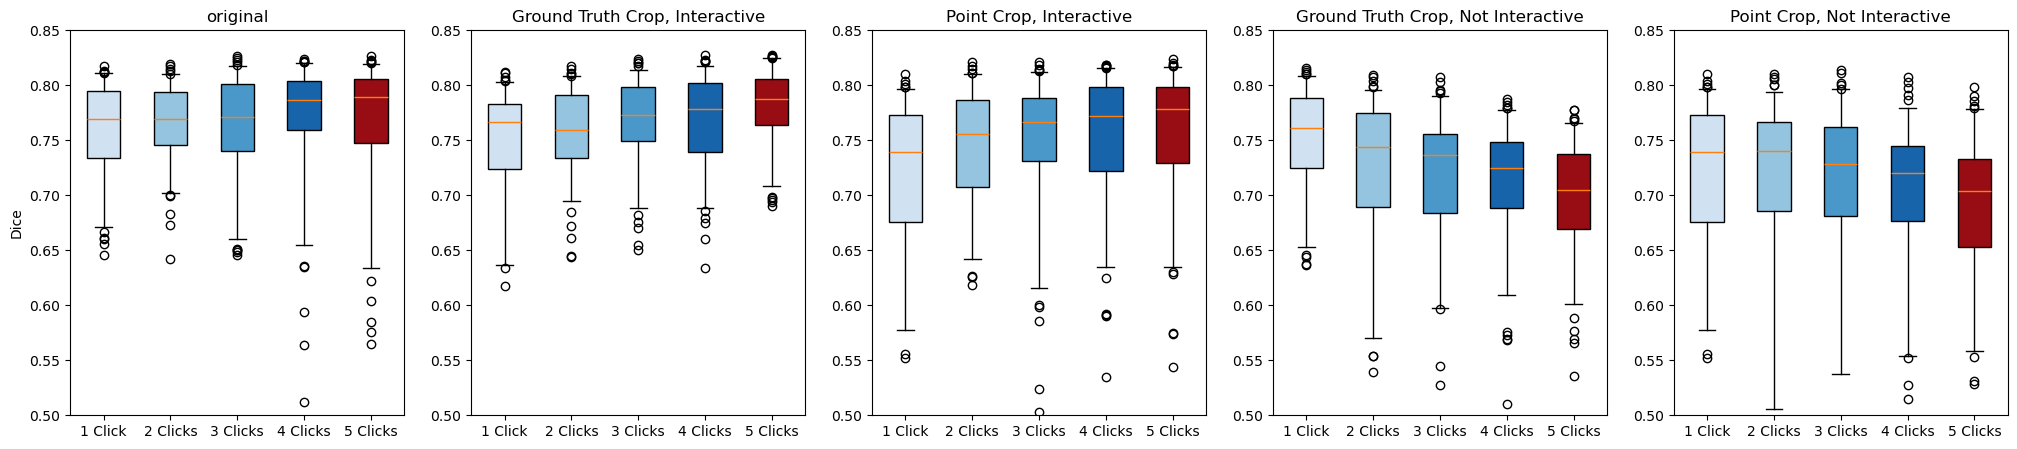

In [14]:
fig, ax = plt.subplots(1,5, figsize = (25,5))
for i, (protocol, data) in enumerate(dice_arrays.items()):
    data = data.T
    box = ax[i].boxplot(data, whis=[5,95], patch_artist=True)

    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

    # Set the x-axis labels
    ax[i].set_xticklabels(['1 Click', '2 Clicks', '3 Clicks', '4 Clicks', '5 Clicks'])

    # Adding title and labels
    ax[i].set_title(protocol_names[protocol])
    ax[i].set_ylim([0.5,0.85])
    ax[i].set_ylabel(None)
    if i == 0:
        ax[i].set_ylabel('Dice')

# Show the plot
plt.show()


In [30]:
with open('/home/t722s/Desktop/Sam-Med3DTest/evalBrats/i_points_not_i.json', 'r') as f:
    i_pts = json.load(f)
diff = np.array([v['dice'] for v in gt_i.values()]).T - np.array([v['dice'] for v in i_pts.values()]).T
diff = diff[1:] # Remove 1 click entry. It's the same.

summary = dict()
df = pd.DataFrame(columns = ['n clicks', 'min', '1st', 'med', 'mean', '3rd', 'std'])

for i, row in enumerate(diff):
    d = dict()
    d = {
        'n clicks': i+2,
        'min': np.min(row),
        '1st': np.quantile(row, 0.25),
        'med': np.median(row),
        'mean': np.mean(row),
        '3rd': np.quantile(row, 0.75),
        'std': np.std(row)
    }
    df.loc[len(df)] = d

df = df.round(decimals=4)
display(df)

,n clicks,min,1st,med,mean,3rd,std
0,2,-0.0682,0.0106,0.0264,0.0325,0.0551,0.0422
1,3,-0.0486,0.0502,0.0782,0.0912,0.1356,0.0722
2,4,-0.0511,0.0701,0.1104,0.1129,0.1613,0.0697
3,5,-0.0186,0.0913,0.1462,0.1462,0.1911,0.0813


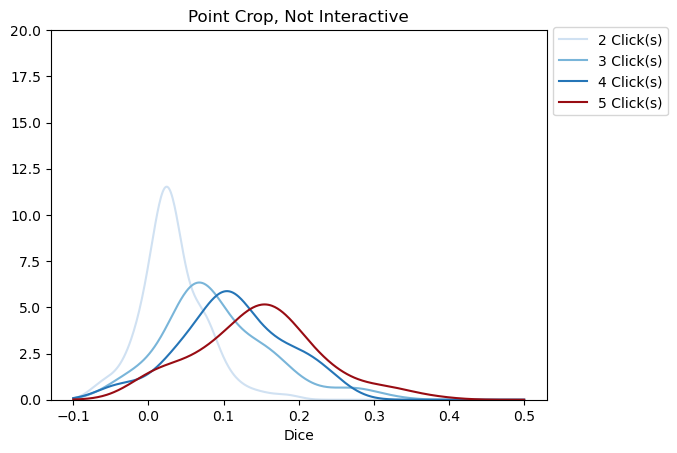

In [31]:
# How much does the iterative approach matter vs the quality of good points? Comparison of protocols using interactive point method and just using points generated from an interactive method.
# Common plotting elements

num_rows = 4
x_range = np.linspace(-0.1, 0.5, 500)
colors = [cm.Blues(i / (num_rows-1) * (color_end - color_start) + color_start) for i in range(num_rows-1)]
colors.append(cm.Reds(0.9))

fig, ax = plt.subplots()
plt.subplots_adjust(hspace=0.5, right=0.9)

for j, row in enumerate(diff):
    kde = gaussian_kde(row)
    kde_values = kde(x_range)
    
    # Plot each row's KDE with a different color
    ax.plot(x_range, kde_values, color=colors[j], label=f'{j+2} Click(s)')

ax.set_title(protocol_names[protocol])
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_ylim([0,20])

fig.legend(loc = 'upper right', bbox_to_anchor=(1.1, 0.9))

ax.set_xlabel('Dice')
plt.show()


0
1


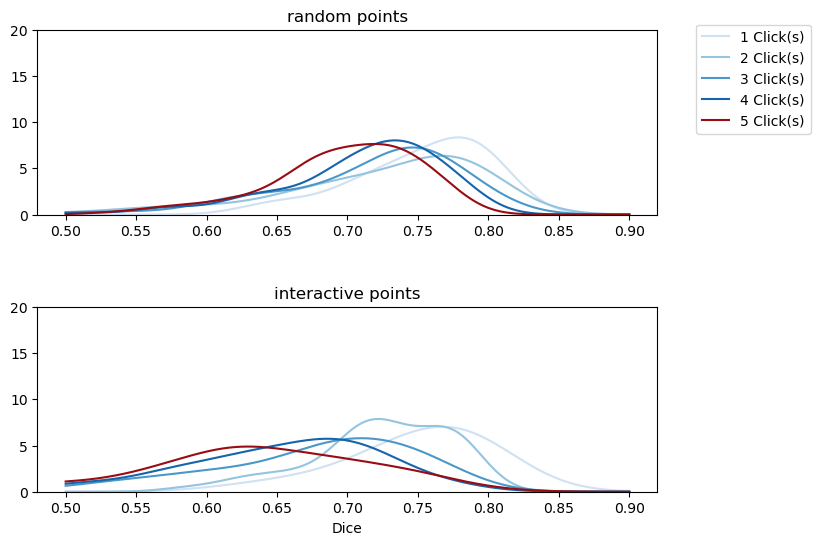

In [43]:
dice_arrays = {
    'random points': np.array([v['dice'] for v in gt_not_i.values()]).T,
    'interactive points': np.array([v['dice'] for v in i_pts.values()]).T,
}

# Common plotting elements
num_rows = 5
colors = [cm.Blues(i / (num_rows-1) * (color_end - color_start) + color_start) for i in range(num_rows-1)]
colors.append(cm.Reds(0.9))
x_range = np.linspace(0.5, 0.9, 500)


fig, ax = plt.subplots(2,1, figsize = (8,6))
plt.subplots_adjust(hspace=0.5, right=0.9)


for i, (protocol, ar) in enumerate(dice_arrays.items()):
    print(i)
    for j, row in enumerate(ar):
        kde = gaussian_kde(row)
        kde_values = kde(x_range)
        
        # Plot each row's KDE with a different color
        ax[i].plot(x_range, kde_values, color=colors[j], label=f'{j+1} Click(s)')

    ax[i].set_title(protocol)
    ax[i].set_xlabel(None)
    ax[i].set_ylabel(None)
    ax[i].set_ylim([0,20])

    if i == 0: 
        fig.legend(loc = 'upper right', bbox_to_anchor=(1.1, 0.9))

ax[1].set_xlabel('Dice')
plt.show()
